In [46]:
import requests
import PyPDF2
import os
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

#Downloading the pdf file
file_url = "https://www.brookings.edu/wp-content/uploads/2020/09/UNESCO-Kim-Care_Africa-ministudy-2020.pdf"

# Get the actual filename from the URL
filename = os.path.basename(file_url)

# Find the position of '.pdf' in the filename and keep only the characters before that position
if '.pdf' in filename:
    filename = filename[:filename.index('.pdf') + 4]

#Create the pdf file locally
r = requests.get(file_url, stream = True)

with open(filename,"wb") as pdf:
    for chunk in r.iter_content(chunk_size=1024):
        '''
        writing one chunk as a time to pdf file
        '''
        if chunk:
            pdf.write(chunk)

# Open PDF file
pdffileObj = open(filename, 'rb')

# Create PDF reader object
pdfReader = PyPDF2.PdfReader(pdffileObj)

# Get the total number of pages in the PDF
num_pages = len(pdfReader.pages)
print("Total number of pages:", num_pages)

# Initialize an empty variable to store the extracted text
all_text = ""

# Loop through each page and extract text
for page_num in range(num_pages):
    # Create a page object for the current page
    pageObj = pdfReader.pages[page_num]
    
    # Extract text from the page
    text = pageObj.extract_text()
    
    # Append the extracted text to the 'all_text' variable
    all_text += text

# Print the combined text from all pages
print("Combined Text:", all_text)

# Close the PDF file object
pdffileObj.close()

Total number of pages: 64
Combined Text: Capturing 21st century skills
Analysis of assessments in selected
sub-Saharan African countries
United Nations
Educational, Scientiﬁc and
Cultural Organization
Dakar
Regional Office
Capturing 21st Century Skills:  Development of Assessments in Selected sub-Saharan African CountriesCapturing 21st century skills
Analysis of assessments in selected
sub-Saharan African countries
Helyn Kim and Esther CareCapturing 21st Century Skills:  Development of Assessments in Selected sub-Saharan African CountriesEducation 
Sector
United Nations
(GXFDWLRQDO6FLHQWL¿FDQG
Cultural OrganizationThe Global Education 2030 Agenda
UNESCO, as the United Nations’ specialized 
agency for education, is entrusted to lead and 
coordinate the Education 2030 Agenda, which is part of a global movement to eradicate poverty through 17 Sustainable Development Goals by 
2030. Education, essential to achieve all of these 
goals, has its own dedicated Goal 4, which aims to “ensure 

In [47]:
all_text.splitlines()
sentiment = all_text.split()
print(sentiment)

['Capturing', '21st', 'century', 'skills', 'Analysis', 'of', 'assessments', 'in', 'selected', 'sub-Saharan', 'African', 'countries', 'United', 'Nations', 'Educational,', 'Scientiﬁc', 'and', 'Cultural', 'Organization', 'Dakar', 'Regional', 'Office', 'Capturing', '21st', 'Century', 'Skills:', 'Development', 'of', 'Assessments', 'in', 'Selected', 'sub-Saharan', 'African', 'CountriesCapturing', '21st', 'century', 'skills', 'Analysis', 'of', 'assessments', 'in', 'selected', 'sub-Saharan', 'African', 'countries', 'Helyn', 'Kim', 'and', 'Esther', 'CareCapturing', '21st', 'Century', 'Skills:', 'Development', 'of', 'Assessments', 'in', 'Selected', 'sub-Saharan', 'African', 'CountriesEducation', 'Sector', 'United', 'Nations', '(GXFDWLRQDO\x0f\x036FLHQWL¿F\x03DQG', 'Cultural', 'OrganizationThe', 'Global', 'Education', '2030', 'Agenda', 'UNESCO,', 'as', 'the', 'United', 'Nations’', 'specialized', 'agency', 'for', 'education,', 'is', 'entrusted', 'to', 'lead', 'and', 'coordinate', 'the', 'Education

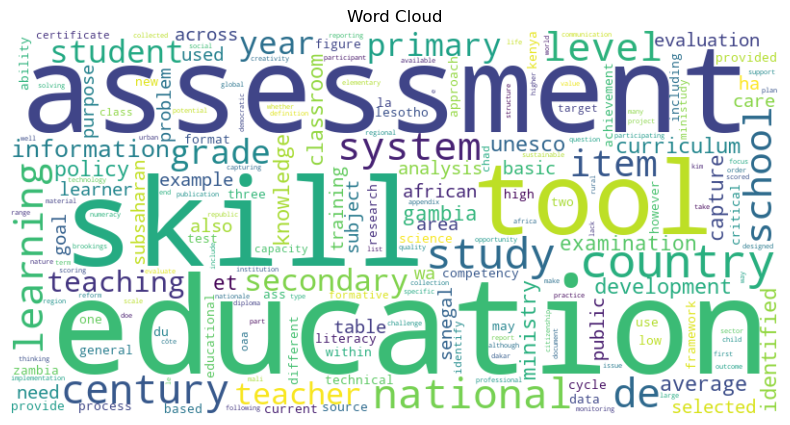

In [48]:
import nltk

#nltk.download('omw-1.4')

import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Sample list of words
word_list = sentiment

# Get the set of stopwords
stop_words = set(stopwords.words('english'))

# Create a translation table to remove punctuation
translator = str.maketrans('', '', string.punctuation)

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Count the occurrence of each relevant word (ignoring capitalization, punctuation, and numbers)
word_counts = {}
for word in word_list:
    # Convert the word to lowercase for case-insensitive comparison
    word = word.lower()

    # Remove punctuation from the word
    word = word.translate(translator)

    # Lemmatize the word to get its base form (singular)
    word = lemmatizer.lemmatize(word)

    # Check if the lowercase word is in the stop words set and if it contains only alphabetic characters
    if word not in stop_words and word.isalpha():
        word_counts[word] = word_counts.get(word, 0) + 1

# Prepare data for plotting
words = list(word_counts.keys())
counts = list(word_counts.values())

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random

# Prepare data for word cloud
wordcloud_data = dict(zip(words, counts))

# Create word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


In [49]:
#Open and Read all Training Data

with open ('trainset/Topic/Adult.txt', "r") as f:
    Adult = f.read().splitlines()

with open ('trainset/Topic/Arts and Entertainment.txt', "r") as f:
    ArtsEntertainment = f.read().splitlines()

with open ('trainset/Topic/Autos and Vehicles.txt', "r") as f:
    AutosVehicles = f.read().splitlines()

with open ('trainset/Topic/Beauty and Fitness.txt', "r") as f:
    BeautyFitness = f.read().splitlines()

with open ('trainset/Topic/Business and Industrial.txt', "r") as f:
    BusinessIndustrial = f.read().splitlines()

with open ('trainset/Topic/Computers and Electronics.txt', "r") as f:
    ComputersElectronics = f.read().splitlines()

with open ('trainset/Topic/Finance.txt', "r") as f:
    Finance = f.read().splitlines()

with open ('trainset/Topic/Food and Drink.txt', "r") as f:
    FoodDrink = f.read().splitlines()

with open ('trainset/Topic/Games.txt', "r") as f:
    Games = f.read().splitlines()

with open ('trainset/Topic/Health.txt', "r") as f:
    Health = f.read().splitlines()

with open ('trainset/Topic/Hobbies and Leisure.txt', "r") as f:
    HobbiesLeisure = f.read().splitlines()

with open ('trainset/Topic/Home and Garden.txt', "r") as f:
    HomeGarden = f.read().splitlines()

with open ('trainset/Topic/Internet and Telecom.txt', "r") as f:
    InternetTelecom = f.read().splitlines()

with open ('trainset/Topic/Jobs and Education.txt', "r") as f:
    JobsEducation = f.read().splitlines()

with open ('trainset/Topic/Law and Government.txt', "r") as f:
    LawGovernment = f.read().splitlines()

with open ('trainset/Topic/News.txt', "r") as f:
    News = f.read().splitlines()

with open ('trainset/Topic/Online Communities.txt', "r") as f:
    OnlineCommunities = f.read().splitlines()

with open ('trainset/Topic/People and Society.txt', "r") as f:
    PeopleSociety = f.read().splitlines()

with open ('trainset/Topic/Pets and Animals.txt', "r") as f:
    PetsAnimals = f.read().splitlines()

with open ('trainset/Topic/Real Estate.txt', "r") as f:
    RealEstate = f.read().splitlines()

with open ('trainset/Topic/Reference.txt', "r") as f:
    Reference = f.read().splitlines()

with open ('trainset/Topic/Science.txt', "r") as f:
    Science = f.read().splitlines()

with open ('trainset/Topic/Sensitive Subjects.txt', "r") as f:
    SensitiveSubjects = f.read().splitlines()

with open ('trainset/Topic/Shopping.txt', "r") as f:
    Shopping = f.read().splitlines()

with open ('trainset/Topic/Sports.txt', "r") as f:
    Sports = f.read().splitlines()

with open ('trainset/Topic/Travel.txt', "r") as f:
    Travel = f.read().splitlines()


In [50]:
data = {}
data["Adult"] = Adult
data["Arts and Entertainment"] = ArtsEntertainment
data["Autos and Vehicles"] = AutosVehicles
data["Beauty and Fitness"] = BeautyFitness
data["Business and Industrial"] = BusinessIndustrial
data["Computers and Electronics"] = ComputersElectronics
data["Finance"] = Finance
data["Food and Drink"] = FoodDrink
data["Games"] = Games
data["Health"] = Health
data["Hobbies and Leisure"] = HobbiesLeisure
data["Home and Garden"] = HomeGarden
data["Internet and Telecom"] = InternetTelecom
data["Jobs and Education"] = JobsEducation
data["Law and Government"] = LawGovernment
data["News"] = News
data["Online Communities"] = OnlineCommunities
data["People and Society"] = PeopleSociety
data["Pets and Animals"] = PetsAnimals
data["Real Estate"] = RealEstate
data["Reference"] = Reference
data["Science"] = Science
data["Sensitive Subjects"] = SensitiveSubjects
data["Shopping"] = Shopping
data["Sports"] = Sports
data["Travel"] = Travel
data

{'Adult': ['John is an adult who works as a software engineer at a tech company.',
  'The legal age to purchase alcohol in this country is 18 for adults.',
  "Adult responsibilities include paying bills, managing finances, and taking care of one's health.",
  'Sarah enjoys reading adult fiction novels in her free time.',
  'The movie is rated R, which means it is suitable for adults only.',
  'As an adult, it is important to make informed decisions about career choices.',
  'Mark attended an adult education program to earn his high school diploma.',
  'The adult population in the city has been steadily increasing over the past decade.',
  'Lisa teaches an adult fitness class at the local gym.',
  'In many cultures, turning 18 is considered a significant milestone as it marks the transition into adulthood.',
  'Adults are expected to abide by the law and fulfill their civic responsibilities.',
  'Anna enrolled in an adult cooking class to improve her culinary skills.',
  'The adult sect

In [51]:
import spacy
import classy_classification

#Apply Classy Model
nlp = spacy.blank("en")
nlp.add_pipe(
    "text_categorizer", 
    config={
        "data": data, 
        "model": "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2",
        "device": "cpu"
    }
) 

print(nlp("Topic Classifications")._.cats)

{'Adult': 0.03816207717629168, 'Arts and Entertainment': 0.028304677032981427, 'Autos and Vehicles': 0.008105021382076956, 'Beauty and Fitness': 0.037243265887392914, 'Business and Industrial': 0.01808399868974877, 'Computers and Electronics': 0.016499317628215614, 'Finance': 0.00485932893177197, 'Food and Drink': 0.014528064769712067, 'Games': 0.01744783111486088, 'Health': 0.0262879378410427, 'Hobbies and Leisure': 0.010881366480653203, 'Home and Garden': 0.030214990590821656, 'Internet and Telecom': 0.006193163550998547, 'Jobs and Education': 0.015218395256097412, 'Law and Government': 0.004519088693444916, 'News': 0.0478646798364091, 'Online Communities': 0.07802787989971816, 'People and Society': 0.012202618312257225, 'Pets and Animals': 0.009150235879765833, 'Real Estate': 0.003528200881036135, 'Reference': 0.5280587104793879, 'Science': 0.016357910255392835, 'Sensitive Subjects': 0.007557197571170737, 'Shopping': 0.015069276197850269, 'Sports': 0.00260778917439026, 'Travel': 0.0

In [52]:
sentence_model = spacy.blank("en")
sentence_model.add_pipe("sentencizer")

In [53]:
segment_size = 100000  # Define the desired segment size

num_segments = len(all_text) // segment_size + 1  # Calculate the number of segments

final_data = []

for i in range(num_segments):
    start_idx = i * segment_size
    end_idx = (i + 1) * segment_size
    segment = all_text[start_idx:end_idx]

    sentences = sentence_model(segment)

    for sentence in sentences.sents:
        doc = nlp(sentence.text)
        final_data.append({"sentence": doc.text, "cats": doc._.cats})

In [54]:
#Show Sample score per Sentence
for item in final_data:
    print (item["sentence"])
    print ("Adult",item["cats"]["Adult"])
    print ("Arts and Entertainment",item["cats"]["Arts and Entertainment"])
    print ("Autos and Vehicles",item["cats"]["Autos and Vehicles"])
    print ("Beauty and Fitness",item["cats"]["Beauty and Fitness"])
    print ("Business and Industrial",item["cats"]["Business and Industrial"])
    print ("Computers and Electronics",item["cats"]["Computers and Electronics"])
    print ("Finance",item["cats"]["Finance"])
    print ("Food and Drink",item["cats"]["Food and Drink"])
    print ("Games",item["cats"]["Games"])
    print ("Health",item["cats"]["Health"])
    print ("Hobbies and Leisure",item["cats"]["Hobbies and Leisure"])
    print ("Home and Garden",item["cats"]["Home and Garden"])
    print ("Internet and Telecom",item["cats"]["Internet and Telecom"])
    print ("Jobs and Education",item["cats"]["Jobs and Education"])
    print ("Law and Government",item["cats"]["Law and Government"])
    print ("News",item["cats"]["News"])
    print ("Online Communities",item["cats"]["Online Communities"])
    print ("People and Society",item["cats"]["People and Society"])
    print ("Pets and Animals",item["cats"]["Pets and Animals"])
    print ("Real Estate",item["cats"]["Real Estate"])
    print ("Reference",item["cats"]["Reference"])
    print ("Science",item["cats"]["Science"])
    print ("Sensitive Subjects",item["cats"]["Sensitive Subjects"])
    print ("Shopping",item["cats"]["Shopping"])
    print ("Sports",item["cats"]["Sports"])
    print ("Travel",item["cats"]["Travel"])


Capturing 21st century skills
Analysis of assessments in selected
sub-Saharan African countries
United Nations
Educational, Scientiﬁc and
Cultural Organization
Dakar
Regional Office
Capturing 21st Century Skills:  Development of Assessments in Selected sub-Saharan African CountriesCapturing 21st century skills
Analysis of assessments in selected
sub-Saharan African countries
Helyn Kim and Esther CareCapturing 21st Century Skills:  Development of Assessments in Selected sub-Saharan African CountriesEducation 
Sector
United Nations
(GXFDWLRQDO6FLHQWL¿FDQG
Cultural OrganizationThe Global Education 2030 Agenda
UNESCO, as the United Nations’ specialized 
agency for education, is entrusted to lead and 
coordinate the Education 2030 Agenda, which is part of a global movement to eradicate poverty through 17 Sustainable Development Goals by 
2030.
Adult 0.10657875898583352
Arts and Entertainment 0.04891242289805635
Autos and Vehicles 0.013458044014302705
Beauty and Fitness 0.0367260536859617

In [55]:
import pandas as pd

# Assuming 'final_data' is a list of dictionaries with keys "sentence" and "cats" for each sentence

# Extract the "sentence" and "cats" data from the final_data list, and trim spaces
sentences = [item["sentence"].strip() for item in final_data]
categories_data = [item["cats"] for item in final_data]

# Create the DataFrame with the "Sentence" column
df_cat = pd.DataFrame({"Sentence": sentences})

# Add the category columns to the DataFrame
category_columns = [
    "Adult",
    "Arts and Entertainment",
    "Autos and Vehicles",
    "Beauty and Fitness",
    "Business and Industrial",
    "Computers and Electronics",
    "Finance",
    "Food and Drink",
    "Games",
    "Health",
    "Hobbies and Leisure",
    "Home and Garden",
    "Internet and Telecom",
    "Jobs and Education",
    "Law and Government",
    "News",
    "Online Communities",
    "People and Society",
    "Pets and Animals",
    "Real Estate",
    "Reference",
    "Science",
    "Sensitive Subjects",
    "Shopping",
    "Sports",
    "Travel"
]

for category in category_columns:
    df_cat[category] = [data[category] for data in categories_data]

# Convert the probability values to percentages and round to two decimal places
#df_cat[category_columns] = (df_cat[category_columns] * 100).round(2).astype(str) + "%"
df_cat[category_columns] = (df_cat[category_columns] * 100).round(6)

# Add a new column with the category_column name that has the highest value
df_cat['Category_Tag'] = df_cat[category_columns].idxmax(axis=1)

# Add a new column for the Filename
df_cat['Filename'] = filename

# Print the final DataFrame
print(df_cat)

# Generate the CSV file path
csv_filename = os.path.join("dataset", "TopicClassification.csv")

# Create the 'dataset' directory if it doesn't exist
os.makedirs(os.path.dirname(csv_filename), exist_ok=True)

# Check if the CSV file already exists
if os.path.exists(csv_filename):
    # Load the existing CSV file into a DataFrame
    df_existing = pd.read_csv(csv_filename)
    # Assume df_cat is the new DataFrame you want to append
    # Append the new data to the existing DataFrame
    df_combined = pd.concat([df_existing, df_cat], ignore_index=True)
else:
    # If the CSV file doesn't exist, just save the new DataFrame directly
    df_combined = df_cat

# Save the combined DataFrame to the CSV file
df_combined.to_csv(csv_filename, index=False)

                                               Sentence      Adult  \
0     Capturing 21st century skills\nAnalysis of ass...  10.657876   
1     Education, essential to achieve all of these \...  10.576903   
2     The Education 2030 Framework for Action provid...  13.370096   
3     UNESCO Education Sector\nEducation is UNESCO’s...   3.493734   
4     UNESCO is the United Nations’ specialized agen...   4.733787   
...                                                 ...        ...   
1008                                                 2.   5.960526   
1009  OAA mini-study – Definition of concepts, UNESC...   5.222235   
1010  The authors, in collaboration with national re...   6.219621   
1011  This publication \nis one of the few in the re...  13.586908   
1012                                                      5.500594   

      Arts and Entertainment  Autos and Vehicles  Beauty and Fitness  \
0                   4.891242            1.345804            3.672605   
1              

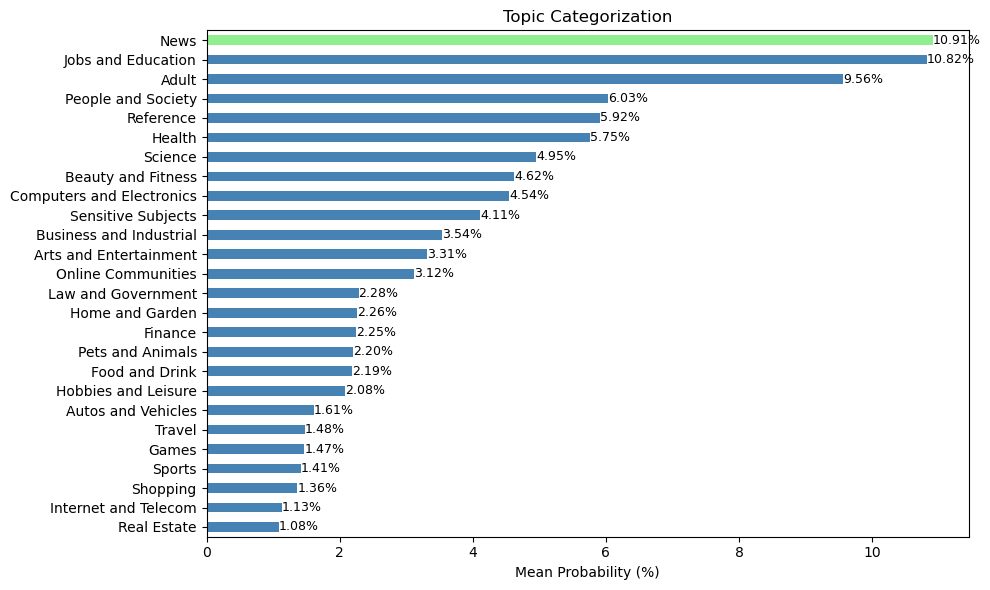

In [56]:
import matplotlib.pyplot as plt

# Calculate the mean probabilities for each category and sort them in descending order
mean_probs = df_cat[category_columns].mean().sort_values(ascending=False)

# Set the color of the highest bar to skyblue and the others to default blue
colors = ['lightgreen' if category == mean_probs.idxmax() else 'steelblue' for category in mean_probs.index]

# Create a horizontal bar chart with data labels
plt.figure(figsize=(10, 6))
mean_probs.plot(kind='barh', color=colors)
plt.title('Topic Categorization')
plt.xlabel('Mean Probability (%)')
#plt.ylabel('Category')
plt.xticks(rotation=0)
for index, value in enumerate(mean_probs):
    plt.text(value, index, f'{value:.2f}%', ha='left', va='center', fontsize=9)

plt.gca().invert_yaxis()  # Invert the y-axis to have the highest bar at the top
plt.tight_layout()
plt.show()